In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#importing the data(csv file)
dataframe=pd.read_csv("Zomato data .csv")
#print Data frame
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [6]:
#converting the data type coloum -rate
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of resturant')

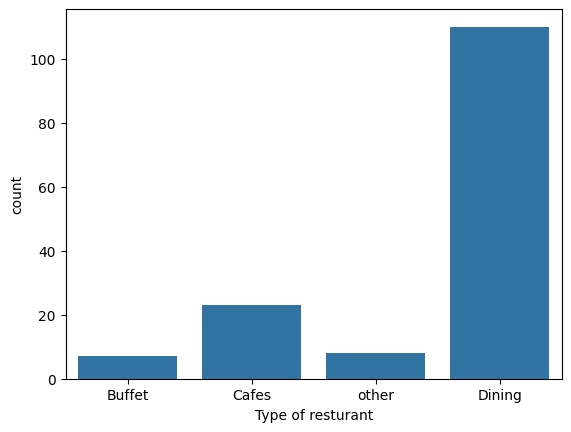

In [ ]:
sns.countplot(x=dataframe["listed_in(type)"])
plt.xlabel("Type of resturant")
# Conclusion : Majority of the resturants falls in dinning category

In [9]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


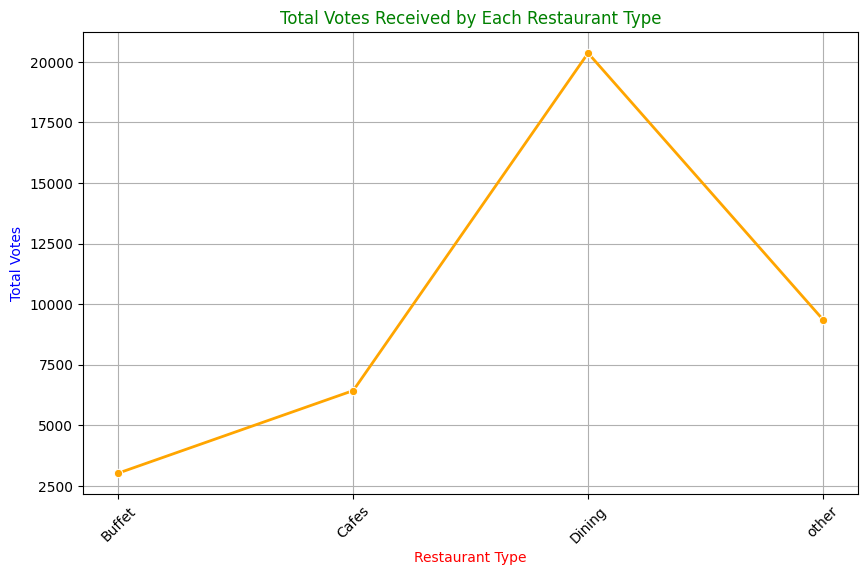

In [17]:
# Grouping by restaurant type and summing the votes
votes_by_type = dataframe.groupby("listed_in(type)")["votes"].sum().reset_index()

# Visualization using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="listed_in(type)", y="votes", data=votes_by_type, marker="o", linewidth=2, color="orange")

# Labels and title
plt.xlabel("Restaurant Type",color="Red")
plt.ylabel("Total Votes",color="b")
plt.title("Total Votes Received by Each Restaurant Type",color="Green")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

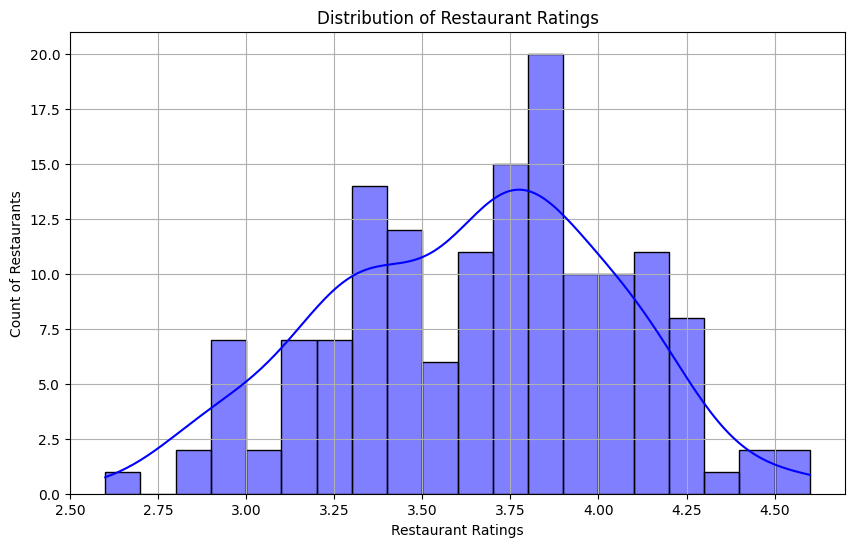

In [ ]:
# Convert ratings to numeric (remove non-numeric values if any)
dataframe["rate"] = pd.to_numeric(dataframe["rate"], errors="coerce")

# Drop NaN values
dataframe = dataframe.dropna(subset=["rate"])

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataframe["rate"], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Restaurant Ratings")
plt.ylabel("Count of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.grid(True)

plt.show()
#Majority of rationg are between 3.5 to 4

Zomato has observe that most of the couple orders online.What is their average spending on each order

In [20]:
# Convert cost column to numeric (remove commas and convert to integer)
dataframe["approx_cost(for two people)"] = dataframe["approx_cost(for two people)"].astype(str).str.replace(",", "").astype(float)

# Filter only restaurants that accept online orders
online_orders = dataframe[dataframe["online_order"] == "Yes"]

# Calculate average spending per order for couples
average_spending_couples = online_orders["approx_cost(for two people)"].mean()

print(f"Average spending per online order for couples: ₹{average_spending_couples:.2f}")

Average spending per online order for couples: ₹510.34


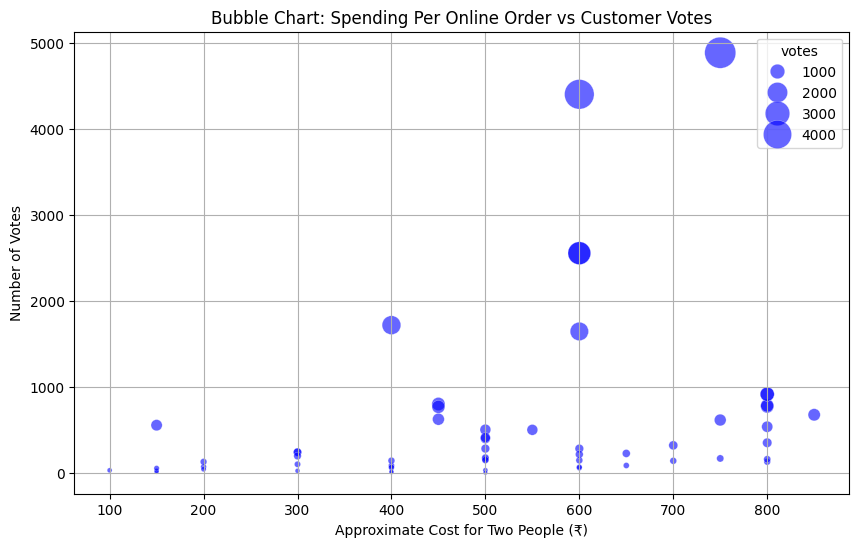

In [22]:
# Convert cost column to numeric (remove commas and convert to integer)
dataframe["approx_cost(for two people)"] = dataframe["approx_cost(for two people)"].astype(str).str.replace(",", "").astype(float)

# Convert votes to numeric
dataframe["votes"] = pd.to_numeric(dataframe["votes"], errors="coerce")

# Filter only restaurants that accept online orders
online_orders = dataframe[dataframe["online_order"] == "Yes"]

# Bubble chart visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=online_orders["approx_cost(for two people)"], 
    y=online_orders["votes"], 
    size=online_orders["votes"], 
    sizes=(10, 500), 
    alpha=0.6, 
    color="blue"
)

# Labels and title
plt.xlabel("Approximate Cost for Two People (₹)")
plt.ylabel("Number of Votes")
plt.title("Bubble Chart: Spending Per Online Order vs Customer Votes")
plt.grid(True)

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3393349846.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="online_order", y="rate", data=dataframe, palette=["orange", "blue"])


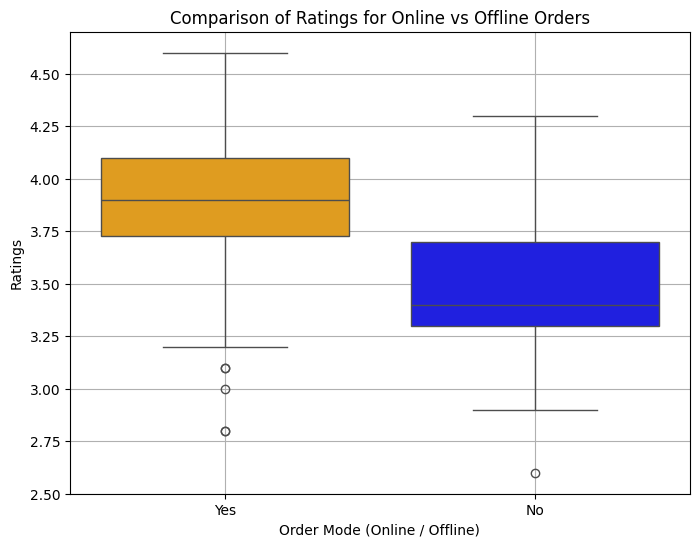

In [ ]:
# Convert ratings to numeric (handle missing or invalid values)
dataframe["rate"] = pd.to_numeric(dataframe["rate"], errors="coerce")

# Drop NaN values in ratings
dataframe = dataframe.dropna(subset=["rate"])

# Visualization using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="online_order", y="rate", data=dataframe, palette=["orange", "blue"])

# Labels and title
plt.xlabel("Order Mode (Online / Offline)")
plt.ylabel("Ratings")
plt.title("Comparison of Ratings for Online vs Offline Orders")
plt.grid(True)

plt.show()
#Box plot compares ratings distribution for online (Yes) and offline (No) orders.

Explanation:
Box plot compares ratings distribution for online (Yes) and offline (No) orders.
X-axis: Order mode (Online/Offline).
Y-axis: Ratings.
palette=["orange", "blue"] differentiates categories visually.
Outliers will be shown as individual points outside the whiskers.

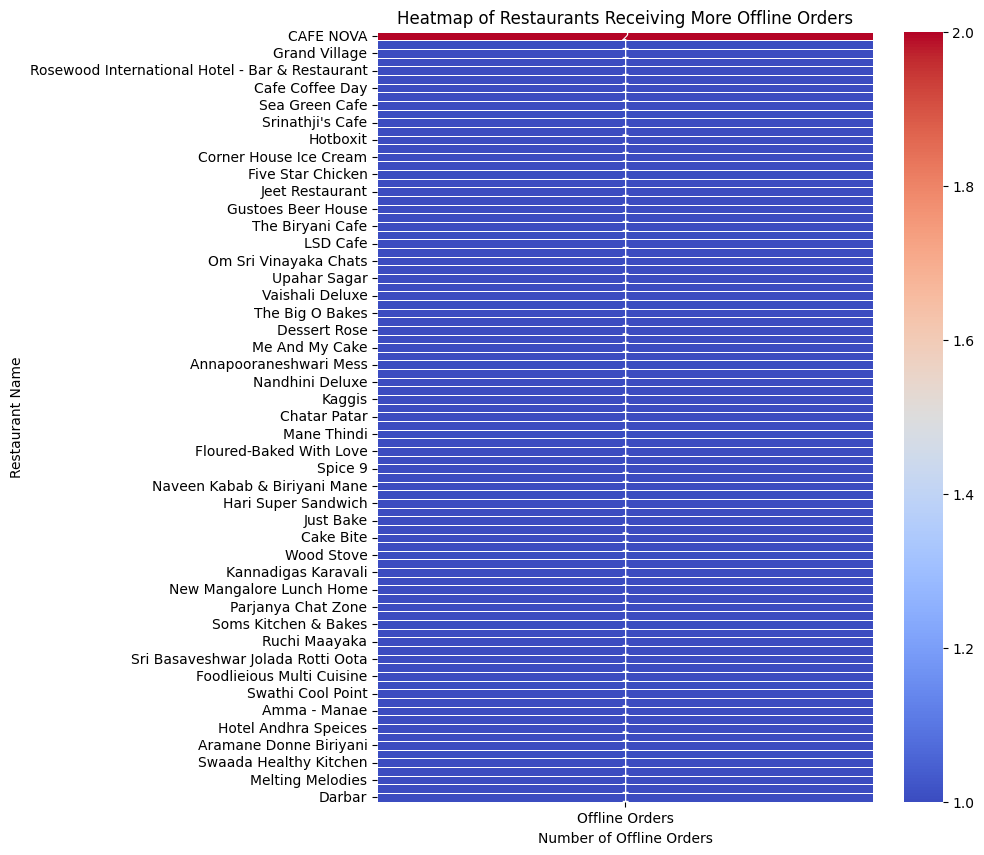

In [27]:
# Filter only offline orders
offline_orders = dataframe[dataframe["online_order"] == "No"]

# Count offline orders per restaurant
offline_order_counts = offline_orders["name"].value_counts().reset_index()
offline_order_counts.columns = ["Restaurant", "Offline Orders"]

# Pivot table for heatmap
pivot_table = offline_order_counts.set_index("Restaurant")

# Visualization using heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5, fmt="d")

# Labels and title
plt.xlabel("Number of Offline Orders")
plt.ylabel("Restaurant Name")
plt.title("Heatmap of Restaurants Receiving More Offline Orders")

plt.show()

1️⃣ Top 10 Restaurants with the Highest Ratings

In [28]:
# Convert ratings to numeric
dataframe["rate"] = pd.to_numeric(dataframe["rate"], errors="coerce")

# Get top 10 highest-rated restaurants
top_rated = dataframe.sort_values(by="rate", ascending=False).head(10)

# Display results
print(top_rated[["name", "rate"]])

                      name  rate
7                   Onesta   4.6
44                  Onesta   4.6
38       Empire Restaurant   4.4
86           Meghana Foods   4.4
52  Corner House Ice Cream   4.3
57                  Wamama   4.2
60           Peppy Peppers   4.2
81           Frozen Bottle   4.2
34                  Faasos   4.2
12        The Coffee Shack   4.2


2️⃣ Distribution of Approximate Cost for Two People (Histogram)

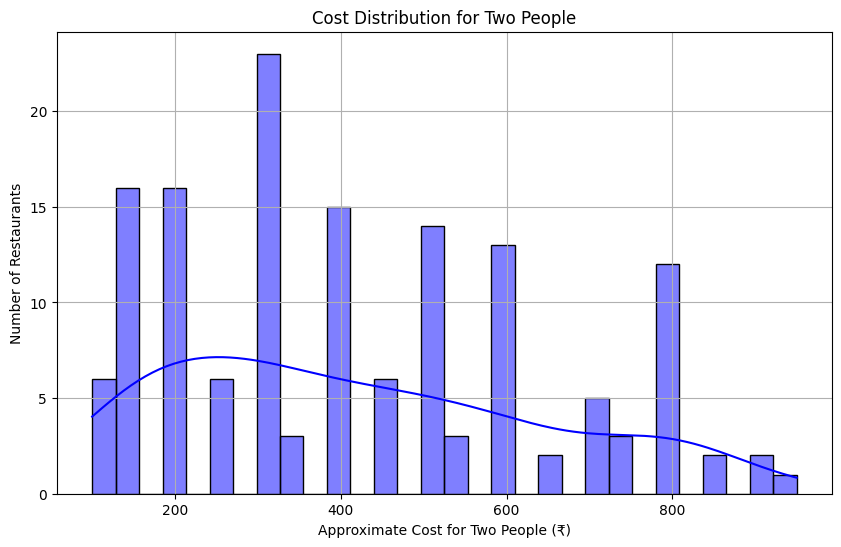

In [29]:
# Convert cost column to numeric
dataframe["approx_cost(for two people)"] = dataframe["approx_cost(for two people)"].astype(str).str.replace(",", "").astype(float)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataframe["approx_cost(for two people)"], bins=30, kde=True, color="blue")

# Labels
plt.xlabel("Approximate Cost for Two People (₹)")
plt.ylabel("Number of Restaurants")
plt.title("Cost Distribution for Two People")
plt.grid(True)

plt.show()

3️⃣ Most Popular Cuisine in Zomato (Bar Chart)

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\4141544264.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette="coolwarm")


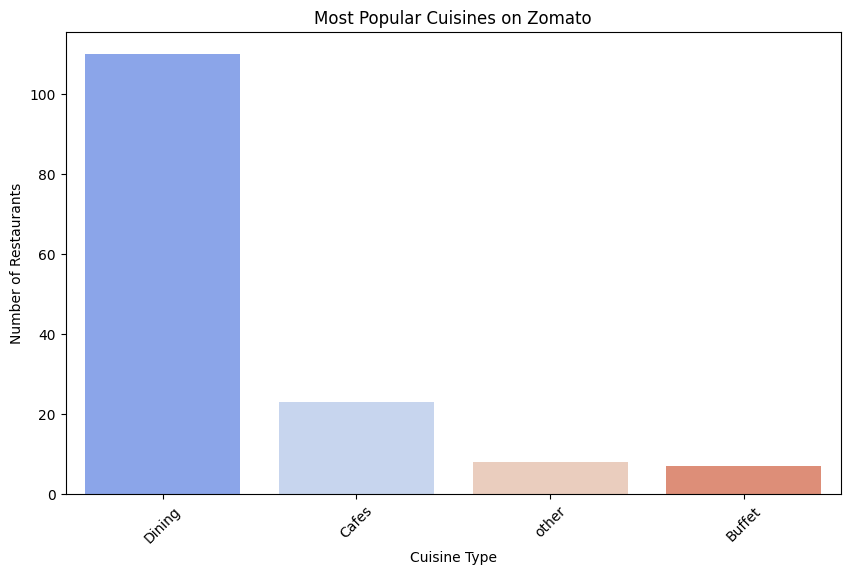

In [30]:
# Count most common cuisines
cuisine_counts = dataframe["listed_in(type)"].value_counts().head(10)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette="coolwarm")

# Labels
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Restaurants")
plt.title("Most Popular Cuisines on Zomato")
plt.xticks(rotation=45)
plt.show()


4️⃣ Relationship Between Ratings and Votes (Scatter Plot)

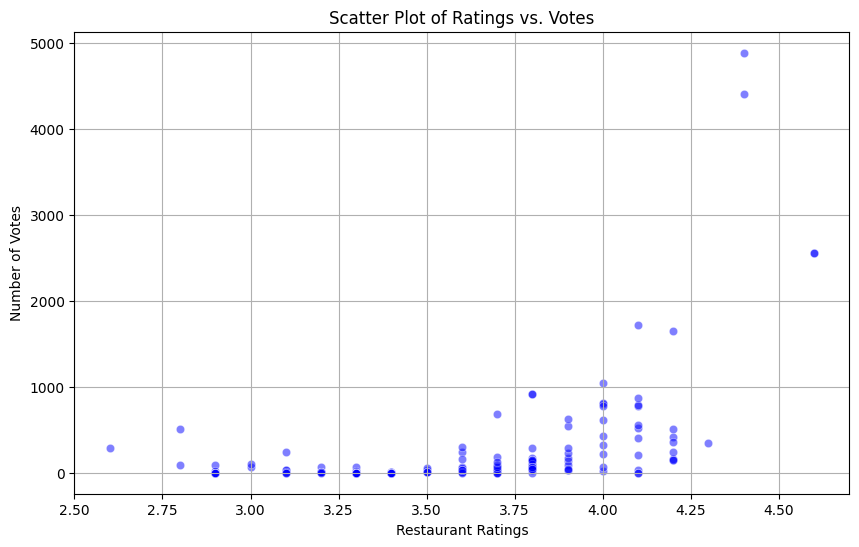

In [31]:
# Convert votes to numeric
dataframe["votes"] = pd.to_numeric(dataframe["votes"], errors="coerce")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataframe["rate"], y=dataframe["votes"], alpha=0.5, color="blue")

# Labels
plt.xlabel("Restaurant Ratings")
plt.ylabel("Number of Votes")
plt.title("Scatter Plot of Ratings vs. Votes")
plt.grid(True)

plt.show()
